In [53]:
#Decision Tree Classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('datasets/banknotes.csv')
df

Variance  Skewness  Curtosis  Entropy  Class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]

In [7]:
x=df[['Variance','Skewness','Curtosis','Entropy']]  # Input Features
# x=df.drop('Class',axis=1)     can also be used
y= df['Class']   # Output Label

In [4]:
x.shape

(1372, 4)

In [5]:
set(y)

{0, 1}

In [6]:
x.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')

In [9]:
x.describe()

Variance     Skewness     Curtosis      Entropy
count  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657
std       2.842763     5.869047     4.310030     2.101013
min      -7.042100   -13.773100    -5.286100    -8.548200
25%      -1.773000    -1.708200    -1.574975    -2.413450
50%       0.496180     2.319650     0.616630    -0.586650
75%       2.821475     6.814625     3.179250     0.394810
max       6.824800    12.951600    17.927400     2.449500

In [10]:
#Explore the data
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

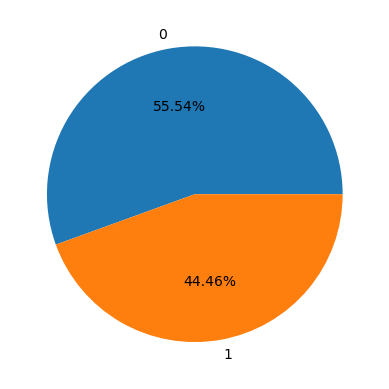

In [11]:
plt.pie(y.value_counts(),labels=y.value_counts().index,autopct='%2.2f%%');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


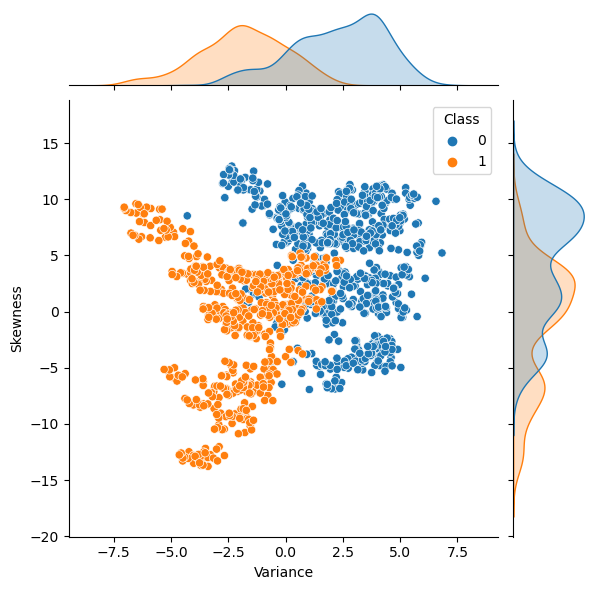

In [13]:
sns.jointplot(x='Variance', y='Skewness', data=df, hue='Class');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

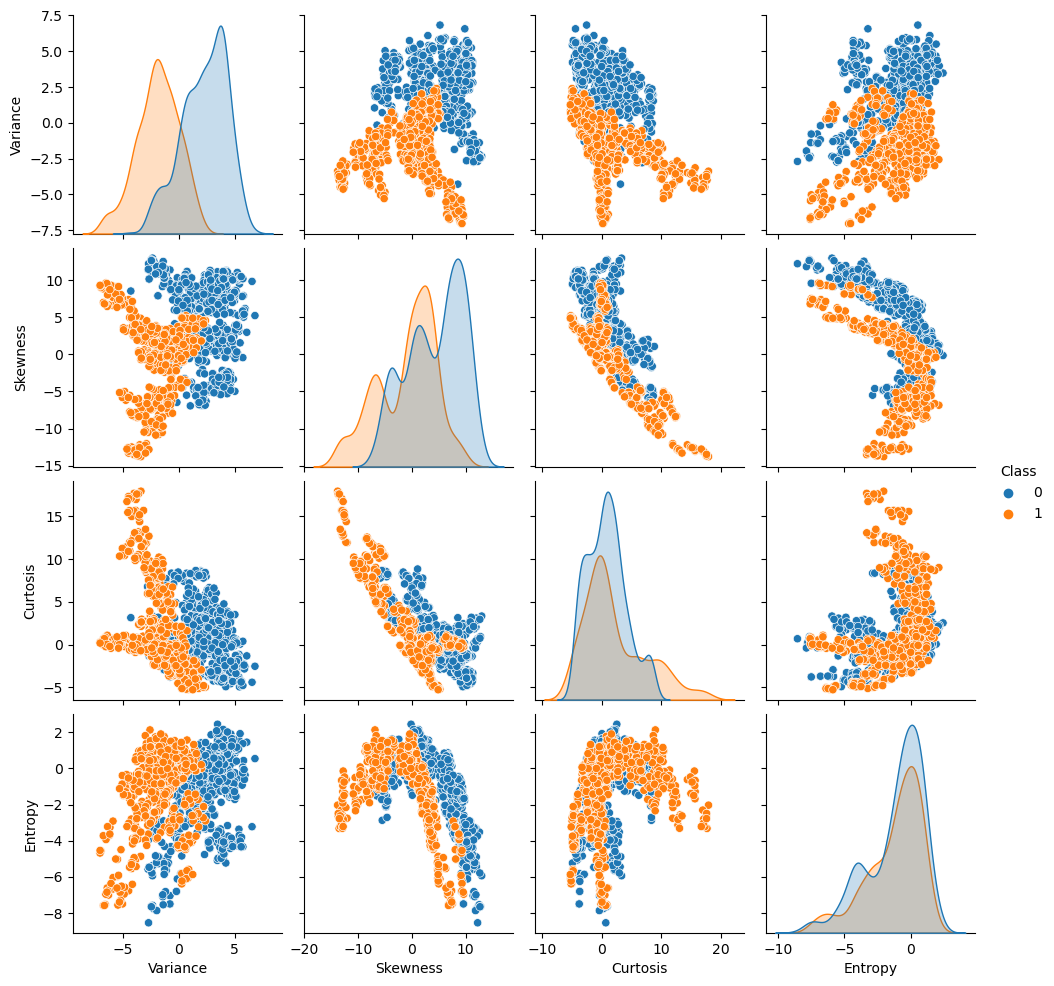

In [14]:
sns.pairplot(df,hue='Class')

In [15]:
# Cross Validation

from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=0)

In [18]:
x_train.shape

(1029, 4)

In [19]:
# Build The model
from sklearn.tree import DecisionTreeClassifier
clf_tree= DecisionTreeClassifier(random_state=0)

In [20]:
# train the algo
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [21]:
clf_tree.score(x_train, y_train)

1.0

In [22]:
# Performance Evaluation
y_pred=clf_tree.predict(x_test)

In [42]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [24]:
print(confusion_matrix(y_test,y_pred))

[[191   4]
 [  3 145]]


In [25]:
accuracy_score(y_test,y_pred)

0.9795918367346939

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



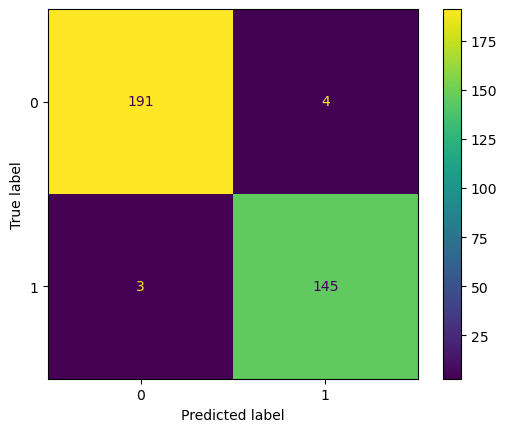

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [28]:
from sklearn.tree import plot_tree

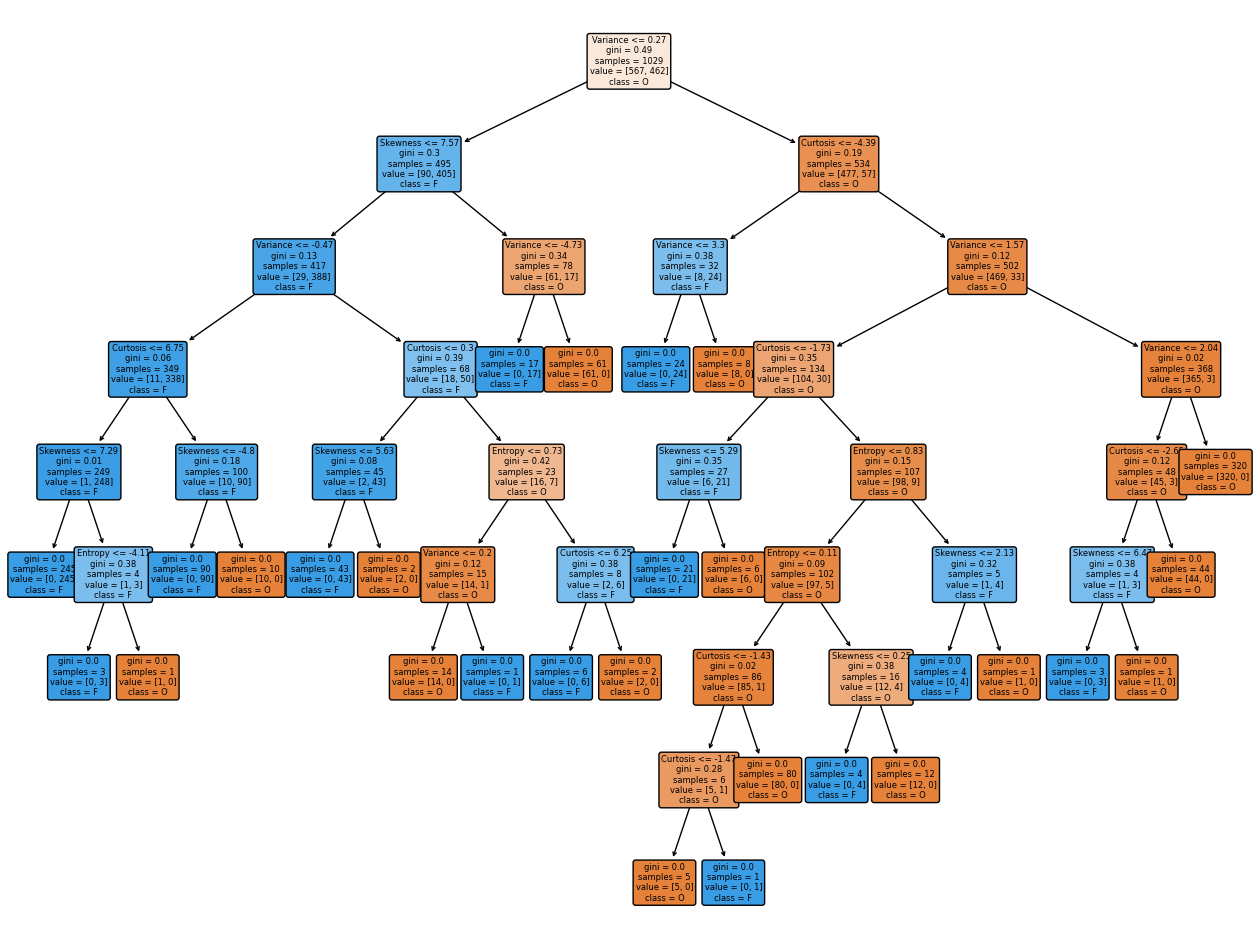

In [36]:
plt.figure(figsize=(16,12))
plot_tree(clf_tree, fontsize=6, feature_names=x.columns,filled=True, precision=2, class_names=['O','F'], rounded=True);
plt.savefig('tree.png')

In [37]:
# Feature Importance
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar(x.columns, clf_tree.feature_importances_, color='navy')

<BarContainer object of 4 artists>

In [38]:
print(clf_tree.feature_importances_)

[0.62095248 0.21106862 0.14189251 0.02608639]


In [39]:
clf_tree.feature_importances_.sum()

1.0

In [46]:
var= float(input('Enter Variance= '))
ske= float(input('Enter Skewnwss= '))
cur= float(input('Enter Curtosis= '))
ent= float(input('Enter Entropy= '))
new_data=pd.DataFrame({'Variance':[var],
                      'Skewness': [ske],
                      'Curtosis':[cur],
                      'Entropy':[ent]})
note=clf_tree.predict(new_data)
if note[0]==0:
    print('Original Note')
else:
    print('Fake Note')

Enter Variance=  0.40614
Enter Skewnwss=  1.34920
Enter Curtosis=  -1.4501
Enter Entropy=  -0.55949


Fake Note


In [47]:
x.head()

Variance  Skewness  Curtosis  Entropy
0   3.62160    8.6661   -2.8073 -0.44699
1   4.54590    8.1674   -2.4586 -1.46210
2   3.86600   -2.6383    1.9242  0.10645
3   3.45660    9.5228   -4.0112 -3.59440
4   0.32924   -4.4552    4.5718 -0.98880

In [48]:
var= float(input('Enter Variance= '))
ske= float(input('Enter Skewnwss= '))
cur= float(input('Enter Curtosis= '))
ent= float(input('Enter Entropy= '))
new_data=pd.DataFrame({'Variance':[var],
                      'Skewness': [ske],
                      'Curtosis':[cur],
                      'Entropy':[ent]})
note=clf_tree.predict(new_data)
if note[0]==0:
    print('Original Note')
else:
    print('Fake Note')

Enter Variance=  3.62160
Enter Skewnwss=  8.6661
Enter Curtosis=  -2.8073
Enter Entropy=  -0.44699


Original Note


In [49]:
new=pd.DataFrame([[3.45660,9.52280,-4.0112,-3.59440],
                   [0.40614, 1.34920, -1.4501,-0.55949],
                   [3.86600,-2.63830, 1.9242,0.10645]],
                  columns=x.columns)

In [50]:
new

Variance  Skewness  Curtosis  Entropy
0   3.45660    9.5228   -4.0112 -3.59440
1   0.40614    1.3492   -1.4501 -0.55949
2   3.86600   -2.6383    1.9242  0.10645

In [51]:
y_p=clf_tree.predict(new)

In [52]:
y_p

array([0, 1, 0], dtype=int64)